In [90]:
from torch import normal
from torch import tensor
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

celebs=datasets.CelebA(root='./celeb/', 
                       transform=transform,
                       download=True)

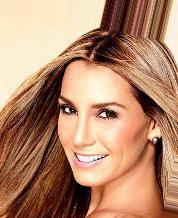

In [79]:
import torchvision as tv
display_trans=tv.transforms.ToPILImage()

# Returns PIL Image from tensor data with pixel RGB values ranging from -1 to 1
def tensorToImage(t):
    display_trans=tv.transforms.ToPILImage()
    return display_trans((t+1)/2)

tensorToImage(celebs[0][0])

In [80]:
# tensor of feature attributes
celebs[0][1]

tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [81]:
import torch
im=celebs[0][0]
im

tensor([[[ 0.9843,  0.9843,  0.9843,  ...,  0.9294,  1.0000,  0.9922],
         [ 0.9843,  0.9843,  0.9843,  ...,  0.9451,  1.0000,  0.9922],
         [ 0.9843,  0.9843,  0.9843,  ...,  0.9608,  1.0000,  1.0000],
         ...,
         [ 0.0980, -0.0980,  0.1451,  ..., -0.0431, -0.0353, -0.0431],
         [ 0.0196,  0.0824,  0.3020,  ..., -0.0745, -0.0588, -0.0745],
         [ 0.3176,  0.6000,  0.9216,  ..., -0.0745, -0.0588, -0.0588]],

        [[ 0.8118,  0.8118,  0.8118,  ...,  0.7882,  0.8588,  0.8667],
         [ 0.8118,  0.8118,  0.8118,  ...,  0.8039,  0.8588,  0.8667],
         [ 0.8118,  0.8118,  0.8118,  ...,  0.8196,  0.8667,  0.8745],
         ...,
         [-0.4196, -0.6157, -0.3882,  ..., -0.5686, -0.5608, -0.5608],
         [-0.5137, -0.4510, -0.2314,  ..., -0.6157, -0.6078, -0.6000],
         [-0.2157,  0.0667,  0.3882,  ..., -0.6157, -0.6078, -0.6078]],

        [[ 0.5216,  0.5216,  0.5216,  ...,  0.6941,  0.7490,  0.7412],
         [ 0.5216,  0.5216,  0.5216,  ...,  0

torch.Size([3, 218, 178])


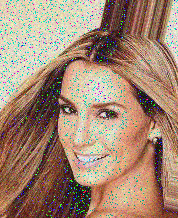

In [82]:
from math import sqrt
# example run of adding gaussian noise to image
var=0.02
im=normal(mean=sqrt(1-sqrt(0.1))*im, std=sqrt(var))

tensorToImage(im)

In [91]:
from math import sqrt
# adds noise to image with var and shifts mean towards 0 using sqrt(1-var)
def add_noise(image, var):
    return normal(mean=sqrt(1-var)*image, std=sqrt(var))


In [92]:
im=celebs[0][0]

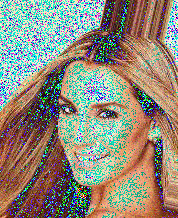

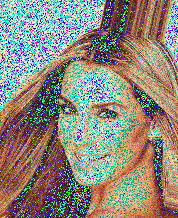

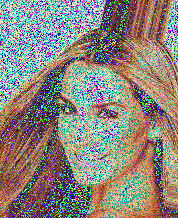

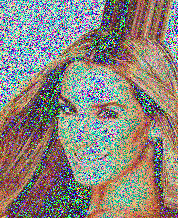

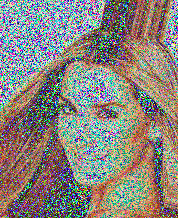

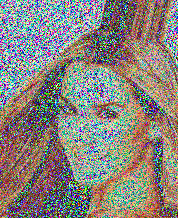

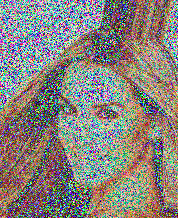

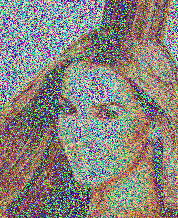

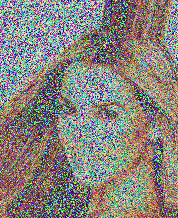

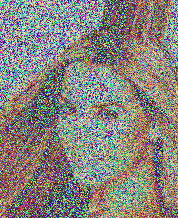

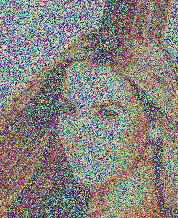

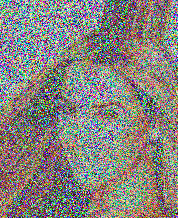

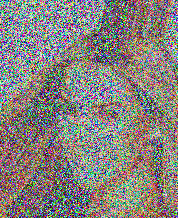

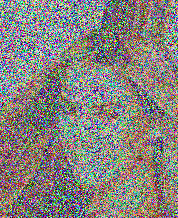

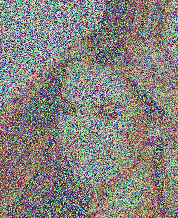

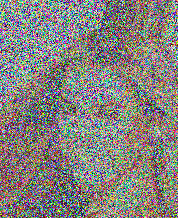

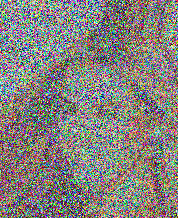

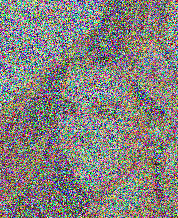

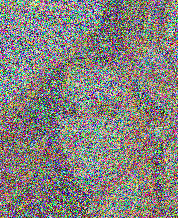

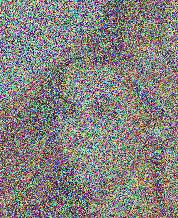

In [93]:
images=[]
for i in range(20):
    im=add_noise(im, 0.02)
    images.append(im)
display(*[tensorToImage(x) for x in images])

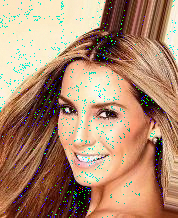

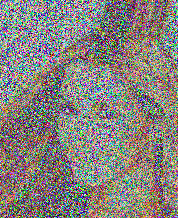

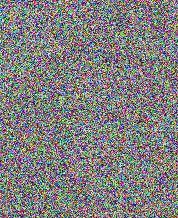

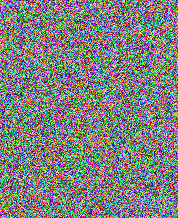

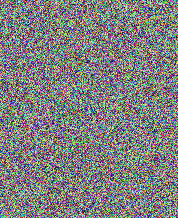

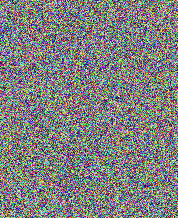

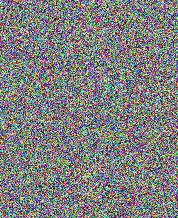

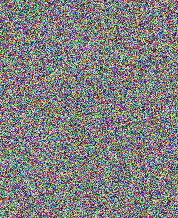

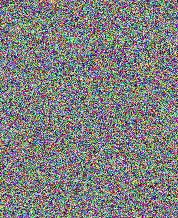

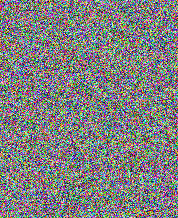

In [86]:
im=celebs[0][0]
# adds gaussian noise to image sequentially following var_scheduler variance
def forward_process(image, var_scheduler=torch.linspace(start=1e-4, end=0.5, steps=100)):
    images=[]
    for var in var_scheduler:
        image=add_noise(image, var)
        images.append(image)
    return images

# puts image through forward process then prints each iteration of process
images=forward_process(im)
display(*[tensorToImage(x) for i, x in enumerate(images) if i%10==0])
    

In [95]:
from torch import nn

# Returns double convolution model with output of shape num_filters x H x W
def double_conv(in_channels, num_filters):
    return 

# Takes in input and number of filters desired and returns output of double convolution with shape N x num_filters x H x W
def conv_block(input, num_filters):
    in_chan = input.shape[1] if len(input.shape)==4 else input.shape[0]
    return nn.Sequential(
        nn.Conv2d(in_channels=in_chan, out_channels=num_filters, kernel_size=(3, 3), bias=False),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=num_filters, out_channels=num_filters, kernel_size=(3, 3), bias=False),
        nn.ReLU(inplace=True)
    )(input)

conv_block(celebs[0][0], 64)


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0071, 0.0460,  ..., 0.0928, 0.0970, 0.1018],
         [0.0414, 0.0657, 0.0358,  ..., 0.0717, 0.0776, 0.0857],
         [0.0734, 0.0218, 0.0914,  ..., 0.0777, 0.0762, 0.0753]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0343, 0.0983, 0.0831],
         [0.0588, 0.0588, 0.0588,  ..., 0.0502, 0.0992, 0.0817],
         [0.0588, 0.0588, 0.0588,  ..., 0.0675, 0.0957, 0.0781],
         ...,
         [0.0982, 0.0678, 0.0489,  ..., 0.1703, 0.1668, 0.1653],
         [0.1102, 0.0771, 0.0000,  ..., 0.1761, 0.1708, 0.1618],
         [0.0000, 0.0000, 0.0000,  ..., 0.1717, 0.1704, 0.1706]],

        [[0.0431, 0.0431, 0.0431,  ..., 0.1038, 0.0891, 0.0426],
         [0.0431, 0.0431, 0.0431,  ..., 0.1127, 0.0786, 0.0386],
         [0.0431, 0.0431, 0.0431,  ..., 0.1180, 0.0696, 0.

In [96]:
from torch.utils import data

# Getting random samples from celebs dataset
random_sampler = data.RandomSampler(celebs, num_samples=10)
dataloader = data.DataLoader(celebs, batch_size=10, sampler=random_sampler)

# Turning dataloader object into a tensor so it is passable into conv_block for testing
celeb_tensor=tensor([])
for i, d in enumerate(dataloader):
    celeb_tensor=torch.cat((celeb_tensor, d[0]), 0)
celeb_tensor.shape

torch.Size([10, 3, 218, 178])

In [100]:
x=conv_block(celeb_tensor, 64)
x=conv_block(x, 128)
x=conv_block(x, 256)
x

tensor([[[[7.7831e-03, 7.7677e-03, 7.7930e-03,  ..., 1.8139e-03,
           1.7366e-03, 1.6365e-03],
          [7.7079e-03, 7.6987e-03, 7.6968e-03,  ..., 1.7633e-03,
           1.6833e-03, 1.5984e-03],
          [7.7623e-03, 7.6772e-03, 7.7177e-03,  ..., 1.7437e-03,
           1.6863e-03, 1.5766e-03],
          ...,
          [9.7140e-03, 9.6487e-03, 8.8075e-03,  ..., 1.1490e-02,
           1.0825e-02, 1.1539e-02],
          [9.6103e-03, 8.9816e-03, 8.4467e-03,  ..., 1.0881e-02,
           1.0238e-02, 9.6426e-03],
          [9.4084e-03, 8.6671e-03, 8.4513e-03,  ..., 8.3986e-03,
           8.5236e-03, 7.5882e-03]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2793e-03,
           1.2335e-03, 1.2558e-03],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2820e-03,
           1.2251e-03, 1.2469e-03],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2999e-03,
           1.2647e-03, 1.2572e-03],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000